In [3]:
!pip install mediapipe

  Using cached mediapipe-0.8.9.1-cp39-cp39-win_amd64.whl (48.5 MB)
  Using cached opencv_contrib_python-4.5.5.64-cp36-abi3-win_amd64.whl (42.2 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)


In [12]:
import math

In [15]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = []
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
    for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
        image = cv2.flip(cv2.imread('./img/0.jpg'), 1)
    # Convert the BGR image to RGB before processing.
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
        print('Handedness:', results.multi_handedness)
        if not results.multi_hand_landmarks:
            continue
        image_height, image_width, _ = image.shape
        annotated_image = image.copy()
        for hand_landmarks in results.multi_hand_landmarks:
            print('hand_landmarks:', hand_landmarks)
            print(
              f'Index finger tip coordinates: (',
              f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
              f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
          )
            mp_drawing.draw_landmarks(
              annotated_image,
              hand_landmarks,
              mp_hands.HAND_CONNECTIONS,
              mp_drawing_styles.get_default_hand_landmarks_style(),
              mp_drawing_styles.get_default_hand_connections_style())
        cv2.imwrite(
            './img/수정' + str(idx) + '.png', cv2.flip(annotated_image, 1))
        # Draw hand world landmarks.
        if not results.multi_hand_world_landmarks:
            continue
        for hand_world_landmarks in results.multi_hand_world_landmarks:
            mp_drawing.plot_landmarks(
            hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)


In [1]:
import cv2
import mediapipe
 
drawingModule = mediapipe.solutions.drawing_utils
handsModule = mediapipe.solutions.hands

ModuleNotFoundError: No module named 'mediapipe'

In [17]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = []
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread("./img/0.jpg"), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/img/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

# 이미지

In [2]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
mp_model = mp_hands.Hands(
    static_image_mode=True, # only static images
    max_num_hands=2, # max 2 hands detection
    min_detection_confidence=0.5) # detection confidence

# we are not using tracking confidence as static_image_mode is true.

## 이미지 반전

In [31]:
image = cv2.imread("img/9.jpg")
# now we flip image and convert to rgb image and input to model
image = cv2.flip(image, 1)
imageco = image.copy()

results = mp_model.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.imshow("img",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
print(results.multi_handedness)

[classification {
  index: 0
  score: 0.97737026
  label: "Left"
}
]


## 이미지  랜드마크 만들기

In [33]:
image_height, image_width, c = image.shape # get image shape
# iterate on all detected hand landmarks
for hand_landmarks in results.multi_hand_landmarks:
      # we can get points using mp_hands
      print(f'Ring finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height})'
      )

Ring finger tip coordinates: ( 94.92117643356323, 72.30308827757835)


## 이미지 좌표와 랜드마크 찍기

In [34]:
pointList = []

In [35]:
for hand_landmarks in results.multi_hand_landmarks:
    mp_drawing.draw_landmarks(
        image, # image to draw
        hand_landmarks, # model output
        mp_hands.HAND_CONNECTIONS, # hand connections
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())
    for point in mp_hands.HandLandmark:
        normalizedLandmark = hand_landmarks.landmark[point]
        pixelCoordinatesLandmark = mp_drawing._normalized_to_pixel_coordinates(normalizedLandmark.x, normalizedLandmark.y, image_width, image_height)

        print(point)
        print(pixelCoordinatesLandmark)
        pointList.append(pixelCoordinatesLandmark)
        print(normalizedLandmark)
cv2.imshow("img",image)
cv2.waitKey(0)

HandLandmark.WRIST
(285, 252)
x: 0.84045506
y: 0.6108359
z: 1.1612916e-06

HandLandmark.THUMB_CMC
(237, 286)
x: 0.69712716
y: 0.6914296
z: -0.057232205

HandLandmark.THUMB_MCP
(184, 282)
x: 0.5412601
y: 0.68348193
z: -0.0942835

HandLandmark.THUMB_IP
(138, 261)
x: 0.40655652
y: 0.6325308
z: -0.117307745

HandLandmark.THUMB_TIP
(98, 250)
x: 0.2895813
y: 0.6059494
z: -0.14233975

HandLandmark.INDEX_FINGER_MCP
(165, 222)
x: 0.48753396
y: 0.53862524
z: -0.13087514

HandLandmark.INDEX_FINGER_PIP
(103, 183)
x: 0.30411446
y: 0.44416332
z: -0.18381368

HandLandmark.INDEX_FINGER_DIP
(66, 160)
x: 0.1947824
y: 0.3867687
z: -0.21145813

HandLandmark.INDEX_FINGER_TIP
(37, 139)
x: 0.11049929
y: 0.33736873
z: -0.22601062

HandLandmark.MIDDLE_FINGER_MCP
(185, 190)
x: 0.54510957
y: 0.45997292
z: -0.12660947

HandLandmark.MIDDLE_FINGER_PIP
(122, 144)
x: 0.36167645
y: 0.34821177
z: -0.1690928

HandLandmark.MIDDLE_FINGER_DIP
(83, 115)
x: 0.2455078
y: 0.27853864
z: -0.19400194

HandLandmark.MIDDLE_FINGER_T

-1

In [36]:
x2 = pointList[7][0] + 10
y2 = pointList[7][1]
if pointList[8][1] < pointList[7][1]:
    x1 = int(pointList[8][0] - abs(pointList[8][0] - pointList[7][0]) / 2)
    y1 = int(pointList[8][1] - abs(pointList[8][1] - pointList[7][1]))
else:
    x1 = int(pointList[8][0] - abs(pointList[8][0] - pointList[7][0]) / 2)
    y1 = int(pointList[8][1] + abs(pointList[8][1] - pointList[7][1]))

In [44]:
abs(pointList[4][0] - pointList[3][0])

50

In [61]:
x2

138

## 이미지 각도 계산

In [37]:
import math
def calRad(x1,y1,x2,y2):
    rad = math.atan2(abs(x2-x1), abs(y2-y1))
    return rad
def radTodeg(rad):
    # math에서 파이값 가져오기
    PI = math.pi
    # 라디안에 180도 곱하고 파이로 나누면 나옴
    deg = (rad * 180) / PI
    # 자리수 맞추기 위해 format 형식으로 출력
    # 중괄호 안에는  0번 인덱스를 출력할거고 소수두번째 자리까지 출력 하며 float함수
    return "{0:0.2f}".format(deg)


In [38]:
rad = calRad(x1,y1,x2,y2)
angle = float(radTodeg(rad))
angle

52.13

In [39]:
image.shape

(414, 340, 3)

In [72]:
crop = imageco[y1:y2 , x1:x2]

cv2.imshow('crop', crop)
cv2.waitKey(0)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [26]:
changeWidth , changeHeight, dd = crop.shape

In [19]:
crop = image[pointList[4][1]:pointList[3][1] , pointList[4][0]:pointList[3][0]]

cv2.imshow('crop', crop)
cv2.waitKey(0)

-1

In [22]:
crop.shape

(64, 105, 3)

## 이미지 각도 변경

In [50]:
from PIL import Image
import numpy as np
 
image1 = Image.open('img/9.jpg')
image1 = image1.transpose(Image.FLIP_LEFT_RIGHT)
 
#이미지의 크기 출력
print(image.size)

imgAngle = image1.rotate(-angle, expand = 1)
 
# 회전한 이미지 다시 cv2로 변환
numpy_image = np.array(imgAngle)  
img = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
imgco = img.copy()
imgco = cv2.cvtColor(imgco, cv2.COLOR_BGR2RGB)
result = mp_model.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(result.multi_handedness)

422280
[classification {
  index: 0
  score: 0.98300016
  label: "Left"
}
]


## 다시 이미지 랜드마크 만들기

In [51]:
image_height, image_width, c = img.shape # get image shape
# iterate on all detected hand landmarks
for hand_landmarks in result.multi_hand_landmarks:
      # we can get points using mp_hands
      print(f'Ring finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height})'
      )

Ring finger tip coordinates: ( 349.85444462299347, 117.42897319793701)


## 다시 이미지 좌표와 랜드마크 찍기

In [52]:
pointList = []

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

for hand_landmarks in result.multi_hand_landmarks:
    mp_drawing.draw_landmarks(
        img, # image to draw
        hand_landmarks, # model output
        mp_hands.HAND_CONNECTIONS, # hand connections
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())
    for point in mp_hands.HandLandmark:
        normalizedLandmark = hand_landmarks.landmark[point]
        pixelCoordinatesLandmark = mp_drawing._normalized_to_pixel_coordinates(normalizedLandmark.x, normalizedLandmark.y, image_width, image_height)

        print(point)
        print(pixelCoordinatesLandmark)
        pointList.append(pixelCoordinatesLandmark)
        print(normalizedLandmark)
cv2.imshow("img",img)
cv2.waitKey(0)

HandLandmark.WRIST
(265, 375)
x: 0.50871557
y: 0.773281
z: 6.2632665e-07

HandLandmark.THUMB_CMC
(216, 338)
x: 0.41498727
y: 0.6956428
z: -0.02775481

HandLandmark.THUMB_MCP
(196, 286)
x: 0.37717968
y: 0.5901518
z: -0.047231767

HandLandmark.THUMB_IP
(197, 236)
x: 0.37795222
y: 0.48744592
z: -0.060565848

HandLandmark.THUMB_TIP
(189, 198)
x: 0.36302564
y: 0.40810516
z: -0.074828476

HandLandmark.INDEX_FINGER_MCP
(244, 244)
x: 0.46884096
y: 0.50274044
z: -0.06571641

HandLandmark.INDEX_FINGER_PIP
(252, 172)
x: 0.48392975
y: 0.35505575
z: -0.09757212

HandLandmark.INDEX_FINGER_DIP
(257, 129)
x: 0.49358803
y: 0.26584077
z: -0.115134545

HandLandmark.INDEX_FINGER_TIP
(263, 94)
x: 0.5043396
y: 0.19518998
z: -0.12465106

HandLandmark.MIDDLE_FINGER_MCP
(282, 248)
x: 0.540559
y: 0.51049995
z: -0.06772473

HandLandmark.MIDDLE_FINGER_PIP
(297, 172)
x: 0.56897676
y: 0.3552118
z: -0.09414373

HandLandmark.MIDDLE_FINGER_DIP
(306, 124)
x: 0.586849
y: 0.25612783
z: -0.109221466

HandLandmark.MIDDLE_F

-1

In [53]:
img.shape

(486, 522, 3)

## 이미지 자르기

In [54]:
x2 = pointList[7][0] + 40
y2 = pointList[7][1]
if pointList[8][1] < pointList[7][1]:
    x1 = pointList[8][0] - 40
    y1 = pointList[8][1] - 40
else:
    x1 = pointList[8][0] - 40
    y1 = pointList[8][1] + 40

In [55]:
rad = calRad(x1,y1,x2,y2)
angle = float(radTodeg(rad))
angle

44.62

In [56]:
imgco.shape

(486, 522, 3)

In [57]:
print(x1,y1,x2,y2)

223 54 297 129


In [58]:
img3 = Image.fromarray(imgco)

# 이미지 자르기 crop함수 이용 ex. crop(left,up, rigth, down)
try:
    croppedImage = img3.crop((x1,y1,x2,y2))

    croppedImage.show()
except:
    croppedImage = img3.crop((x1,y2,x2,y1))

    croppedImage.show()
 
print("잘려진 사진 크기 :",croppedImage.size)
 
croppedImage.save('croppedImage.PNG')

잘려진 사진 크기 : (74, 75)


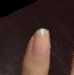

In [59]:
croppedImage

In [60]:
noImage = np.array(croppedImage)
noImage = cv2.cvtColor(noImage, cv2.COLOR_RGB2BGR)
imgcopy = noImage.copy()
#imgcopy = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2RGB)

In [61]:
imgcopy.shape

(75, 74, 3)

## 이미지 에지 추출

In [4]:
imged = cv2.cvtColor(imgcopy, cv2.IMREAD_GRAYSCALE)

edge = cv2.Canny(imged, 50, 150)
# 색상 반전
edge2 = cv2.bitwise_not(edge)

cv2.imshow("edge", edge)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'imgcopy' is not defined

## 이미지 변환(명훈쌤)

In [36]:

cv2.imshow("original",imgcopy)

img_yuv = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2YUV)

# 밝기 채널에 대해서 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

# 밝기 채널에 대해서 CLAHE 적용
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

# h : -180 ~ 180
# s : 0 ~ 255
# v : 0 ~ 255
# 최소값
lower = np.array([100, 0, 0])
# # 최대값
upper = np.array([180, 255, 255])
# # 출력
hsv = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2HSV)
# # 최소값과 최대값에 해당되는 범위를 마스크로 생성
mask = cv2.inRange(hsv, lower, upper)
# # 마스크에 포함된 이미지 픽셀값만을 (마스크와 이미지를 AND 연산) 이미지에 표시
imgcopy = cv2.bitwise_and(imgcopy, imgcopy, mask=mask)

imgcopy = cv2.cvtColor(imgcopy, cv2.COLOR_HSV2BGR)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


cv2.imshow("clahe", img_clahe)
cv2.imshow("mask", imgcopy)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 실험

In [27]:
# 정규화
img_yuv = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2GRAY)
# 밝기 채널에 대해서 이퀄라이즈 적용
img_eq = img_yuv.copy()

img_eq = cv2.equalizeHist(img_eq)

In [21]:
cv2.imshow("clahe",img_eq)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# 정규화
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img_clahe)       
cv2.imshow("clahe",img_clahe)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

### RGB

In [2]:
# 정규화
img_clahe = cv2.imread("./img/0.jpg")
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img_clahe)       
cv2.imshow("clahe",img_clahe)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\clahe.cpp:353: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function '`anonymous-namespace'::CLAHE_Impl::apply'


In [3]:
#img_yuv = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2RGB)
cv2.imshow('img', img_clahe)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

#--② 히스토그램 계산 및 그리기
channels = cv2.split(img_clahe)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

NameError: name 'plt' is not defined

### HSV

In [28]:
imgHsv = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(imgHsv)
cv2.imshow("imgHsv",imgHsv)
#cv2.imshow("h",h)
cv2.imshow("s",s)
cv2.imshow("v",v)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
output1H = cv2.equalizeHist(h)
output1S = cv2.equalizeHist(s)
output1V = cv2.equalizeHist(v)

equ = cv2.merge((output1H, output1S, output1V))


#cv2.imshow("imgHsv",equ)
#k = cv2.waitKey(0)
#cv2.destroyAllWindows()

In [237]:
cv2.imwrite("test4.jpg", equ)

True

In [30]:
equ[equ[:,:,0]>=150] = 0
equ[equ[:,:,1]>= 100] = 0
equ[equ[:,:,2] < 190] =0
cv2.imshow("equ",equ)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

In [135]:
equ[45][39]

array([ 33, 103, 242], dtype=uint8)

### YCbCr

In [65]:
imgYcbcr = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2YCR_CB)
y, cr,cb = cv2.split(imgYcbcr)
cv2.imshow("imgHsv",imgYcbcr)
cv2.imshow("y",y)
cv2.imshow("cr",cr)
cv2.imshow("cb",cb)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
output1Y = cv2.equalizeHist(y)
output1Cr = cv2.equalizeHist(cr)
output1Cb = cv2.equalizeHist(cb)

ycrcbequ = cv2.merge((output1Y, output1Cr, output1Cb))


cv2.imshow("ycrcbequ",ycrcbequ)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
cv2.imwrite("test3.jpg", ycrcbequ)

True

In [95]:
img_clahe[img_clahe>=200]=0
cv2.imshow("clahe",img_clahe)
k = cv2.waitKey(0) 
cv2.destroyAllWindows()

In [48]:
cv2.imwrite('test1.jpg',img_clahe)

True

In [50]:
img_clahe[40,50]

array([ 0, 42, 50], dtype=uint8)

In [57]:
# 밝기 채널에 대해서 CLAHE 적용

img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

# h : -180 ~ 180
# s : 0 ~ 255
# v : 0 ~ 255
# 최소값
lower = np.array([100, 0, 0])
# # 최대값
upper = np.array([180, 255, 255])
# # 출력
hsv = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2HSV)
# # 최소값과 최대값에 해당되는 범위를 마스크로 생성
mask = cv2.inRange(hsv, lower, upper)
# # 마스크에 포함된 이미지 픽셀값만을 (마스크와 이미지를 AND 연산) 이미지에 표시
imgcopy = cv2.bitwise_and(imgcopy, imgcopy, mask=mask)

imgcopy = cv2.cvtColor(imgcopy, cv2.COLOR_HSV2BGR)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


cv2.imshow("clahe", img_clahe)
cv2.imshow("mask", imgcopy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
img_clahe

array([[[  0, 130,   0],
        [  0, 130,   0],
        [  0, 130,   0],
        ...,
        [  0,  66,   0],
        [189, 255, 129],
        [189, 255, 129]],

       [[  0, 130,   0],
        [  0, 130,   0],
        [  0, 130,   0],
        ...,
        [194, 255, 127],
        [189, 255, 129],
        [207, 255, 128]],

       [[  0, 130,   0],
        [  0, 130,   0],
        [  0, 130,   0],
        ...,
        [209, 255, 125],
        [207, 255, 128],
        [215, 255, 122]],

       ...,

       [[118, 255, 116],
        [111, 255, 118],
        [111, 255, 118],
        ...,
        [  0,  36,  46],
        [  0,  31,  65],
        [  0,  32,  84]],

       [[105, 255, 120],
        [107, 255, 119],
        [107, 255, 119],
        ...,
        [  0,  34,  58],
        [  0,  32,  66],
        [  0,  29,  74]],

       [[130, 255, 112],
        [107, 255, 119],
        [122, 255, 114],
        ...,
        [  0,  31,  57],
        [  0,  32,  66],
        [  0,  33,  77]]

In [78]:
#imged = cv2.cvtColor(imgcopy, cv2.IMREAD_GRAYSCALE)

edge = cv2.Canny(imged, 50, 200)
# 색상 반전
edge2 = cv2.bitwise_not(edge)

cv2.imshow("edge", edge)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 딱 자르기

In [62]:
import cv2, sys
from matplotlib import pyplot as plt
import numpy as np

In [63]:
# PIL로 잘려진 이미지 cv로 변환
noImage = np.array(croppedImage)
noImage = cv2.cvtColor(noImage, cv2.COLOR_RGB2BGR)
imgcopy = noImage.copy()
#imgcopy = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(imgcopy, cv2.IMREAD_GRAYSCALE)

# 에지 검출
edge = cv2.Canny(image_gray, 50, 129)
# 색상 반전
edge2 = cv2.bitwise_not(edge)

cv2.imshow("edge", edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)
cv2.imshow('closed', closed)
cv2.waitKey(0)
cv2.destroyAllWindows()

contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

contours_xy = np.array(contours)
contours_xy.shape

# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)

# image trim 하기
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min

0
73
0
74


C:\Users\smhrd\AppData\Local\Temp/ipykernel_23976/3944562558.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  contours_xy = np.array(contours)


## 자른 이미지 보여주기

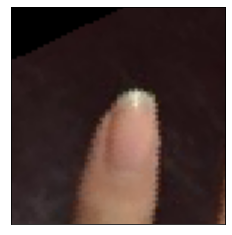

In [64]:
# 이미지 자르기 crop함수 이용 ex. crop(left,up, rigth, down)
finger_image = croppedImage.crop((x_min,y_min,x_max,y_max))
finger_image.show()

plt.imshow(finger_image)
plt.xticks([])
plt.yticks([])
plt.show()

In [101]:
finger_image = np.array(finger_image)

hsv_img = cv2.cvtColor(finger_image, cv2.COLOR_BGR2HSV)  # BGR to HSV conversion
hsv_img = cv2.resize(hsv_img, (250, 250))

img_s = hsv_img[:, :, 1]  # Extracting Saturation channel on which we will work

img_s_blur = cv2.GaussianBlur(img_s, (7, 7), 0)  # smoothing before applying  threshold

img_s_binary = cv2.threshold(img_s_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]  # Thresholding to generate binary image (ROI detection)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
img_s_binary = cv2.morphologyEx(img_s_binary, cv2.MORPH_OPEN, kernel, iterations=3)  # reduce some noise

img_croped = cv2.bitwise_and(img_s, img_s_binary) * 2  # ROI only image extraction & contrast enhancement, you can crop this region 

abs_grad_x = cv2.convertScaleAbs(cv2.Sobel(img_croped, cv2.CV_64F, 1, 0, ksize=3))
abs_grad_y = cv2.convertScaleAbs(cv2.Sobel(img_croped, cv2.CV_64F, 0, 1, ksize=3))
grad = cv2.addWeighted(abs_grad_x, .5, abs_grad_y, .5, 0)  # Gradient calculation
grad = cv2.medianBlur(grad, 13)

edges = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Contours Detection
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnt = None
max_area = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > max_area:  # Filtering contour
        max_area = area
        cnt = c

cv2.drawContours(hsv_img, [cnt], 0, (0, 255, 0), 3)

cv2.imshow("img_s", img_s)
cv2.imshow("img_s_blur", img_s_blur)
cv2.imshow("img_croped", img_croped)
cv2.imshow("grad", grad)
cv2.imshow("Edges",edges)
#cv2.imshow("mask",mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 헤리스 표현인데 쓸지 안쓸지 모름

In [107]:
finger = np.array(finger_image)
gray = cv2.cvtColor(finger, cv2.COLOR_BGR2GRAY)

corner = cv2.cornerHarris(gray, 2, 3, 0.05)
finger[corner > 0.01 * corner.max()] = [0,255,0]

corner_norm = cv2.normalize(corner, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

cv2.imshow('Harris', imgcopy)
cv2.imshow('corner', corner_norm)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
def processImage(image_path, output_dir):
    """ Process input image and save output image to given directory. """
    image = cv2.flip(cv2.imread(image_path), 1)
    if image is None: return
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.multi_hand_landmarks:
        return # if there are no detections, we can skip the rest of the code in this function

    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # flip and write output image to disk
    cv2.imwrite(f"{output_dir}/{image_path.split('/')[-1]}", cv2.flip(image, 1))

In [27]:
import os
for image in os.listdir("0.jpg"):
    processImage(f"img/{image}", "output")

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '0.jpg'